# Baseball Analysis
##### By: Praneetha Potiny

##### The data in this analysis was taken from http://www.seanlahman.com/baseball-archive/statistics/

In [1]:
# Let's start by importing all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

### My first question concerning this dataset is:
### 1) What possible factors are correlated with receiving pitcher awards? (excluding relief pitchers)


In [2]:
# Let's look at the awards in our dataset and see which ones we want to analyze.

player_awards = pd.read_csv('baseball/AwardsPlayers.csv')

player_awards["awardID"].unique()

array(['Pitching Triple Crown', 'Triple Crown',
       'Baseball Magazine All-Star', 'Most Valuable Player',
       'TSN All-Star', 'TSN Guide MVP',
       'TSN Major League Player of the Year', 'TSN Pitcher of the Year',
       'TSN Player of the Year', 'Rookie of the Year', 'Babe Ruth Award',
       'Lou Gehrig Memorial Award', 'World Series MVP', 'Cy Young Award',
       'Gold Glove', 'TSN Fireman of the Year', 'All-Star Game MVP',
       'Hutch Award', 'Roberto Clemente Award', 'Rolaids Relief Man Award',
       'NLCS MVP', 'ALCS MVP', 'Silver Slugger', 'Branch Rickey Award',
       'Hank Aaron Award', 'TSN Reliever of the Year',
       'Comeback Player of the Year'], dtype=object)

#### It looks like there are a lot of awards here.
####  After looking up which awards have to do with pitching, here is a list of all pitching-related awards:
<li> Pitching Triple Crown </li>
<li> Cy Young Award </li>
<li> TSN Pitcher of the Year </li>

In [3]:
# Let's find all the pitchers that won at least one award

is_pitch = player_awards['awardID'].isin(['Pitching Triple Crown', 'Cy Young Award', 'TSN Pitcher of the Year'])
awarded_pitchers = player_awards[is_pitch][['playerID', 'yearID', 'lgID', 'awardID']]

print awarded_pitchers['playerID'].unique()

['bondto01' 'heckegu01' 'radboch01' 'keefeti01' 'clarkjo01' 'rusieam01'
 'youngcy01' 'wadderu01' 'mathech01' 'johnswa01' 'alexape01' 'vaughhi01'
 'vanceda01' 'grovele01' 'gomezle01' 'waltebu01' 'fellebo01' 'newhoha01'
 'voisebi01' 'borowha01' 'lemonbo01' 'sainjo01' 'kindeel01' 'polleho01'
 'konstji01' 'roepr01' 'shantbo01' 'roberro01' 'portebo01' 'spahnwa01'
 'antonjo02' 'fordwh01' 'newcodo01' 'piercbi02' 'turlebo01' 'wynnea01'
 'jonessa02' 'lawve01' 'estrach01' 'drysddo01' 'donovdi01' 'koufasa01'
 'chancde01' 'grantmu01' 'kaatji01' 'lonboji01' 'mccormi03' 'mclaide01'
 'gibsobo01' 'cuellmi01' 'seaveto01' 'perryji01' 'mcdowsa01' 'bluevi01'
 'jenkife01' 'perryga01' 'carltst01' 'woodwi01' 'palmeji01' 'bryanro01'
 'hunteca01' 'marshmi01' 'jonesra01' 'lylesp01' 'ryanno01' 'guidrro01'
 'flanami01' 'suttebr01' 'niekrjo01' 'stonest01' 'fingero01' 'valenfe01'
 'morrija02' 'vuckope01' 'stiebda01' 'hoytla01' 'dennyjo01' 'hernawi01'
 'sutclri01' 'saberbr01' 'goodedw01' 'clemero02' 'scottmi03' 'bed

In [4]:
# Let's get the pitcher stats

pitcher_stats = pd.read_csv('baseball/Pitching.csv')

# Create some new variables

pitcher_stats['win%'] = pitcher_stats['W']/pitcher_stats['G']
pitcher_stats['lose%'] = pitcher_stats['L']/pitcher_stats['G']

# Fill NaNs with 0:
pitcher_stats = pitcher_stats.fillna(0)

pitcher_stats = pd.merge(pitcher_stats, awarded_pitchers, how='left', on=['playerID', 'yearID', 'lgID'])
pitcher_stats = pitcher_stats.fillna('None')

pitcher_stats[pitcher_stats['playerID'] == 'glavito02'].head(10)

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,BK,BFP,GF,R,SH,SF,GIDP,win%,lose%,awardID
26053,glavito02,1987,1,ATL,NL,2,4,9,9,0,...,1,238.0,0.0,34,0.0,0.0,0.0,0.222222,0.444444,None
26522,glavito02,1988,1,ATL,NL,7,17,34,34,1,...,2,844.0,0.0,111,0.0,0.0,0.0,0.205882,0.500000,None
26997,glavito02,1989,1,ATL,NL,14,8,29,29,6,...,0,766.0,0.0,88,0.0,0.0,0.0,0.482759,0.275862,None
27494,glavito02,1990,1,ATL,NL,10,12,33,33,1,...,1,929.0,0.0,111,0.0,0.0,0.0,0.303030,0.363636,None
28021,glavito02,1991,1,ATL,NL,20,11,34,34,9,...,2,989.0,0.0,83,0.0,0.0,0.0,0.588235,0.323529,Cy Young Award
28022,glavito02,1991,1,ATL,NL,20,11,34,34,9,...,2,989.0,0.0,83,0.0,0.0,0.0,0.588235,0.323529,TSN Pitcher of the Year
28504,glavito02,1992,1,ATL,NL,20,8,33,33,7,...,0,919.0,0.0,81,0.0,0.0,0.0,0.606061,0.242424,None
28998,glavito02,1993,1,ATL,NL,22,6,36,36,4,...,0,1014.0,0.0,91,0.0,0.0,0.0,0.611111,0.166667,None
29534,glavito02,1994,1,ATL,NL,13,9,25,25,2,...,1,731.0,0.0,76,0.0,0.0,0.0,0.520000,0.360000,None
30071,glavito02,1995,1,ATL,NL,16,7,29,29,3,...,0,822.0,0.0,76,0.0,0.0,0.0,0.551724,0.241379,None


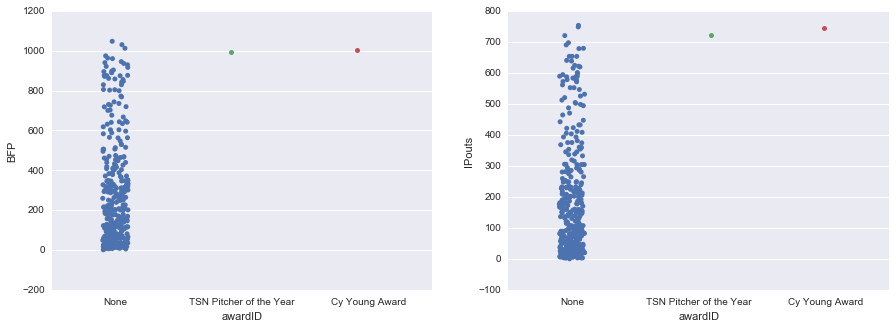

In [5]:
# Compare one instance with all other players in that year...
# Since there's a lot of data, let's just start with 2000-2014. I'll analyze a single instance of 2000 player data.
# First, create definition that works for us

nl_2000 = pitcher_stats.loc[(pitcher_stats['yearID'] == 2000) & (pitcher_stats['lgID'] == 'NL')]

%matplotlib inline

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.stripplot('awardID', 'BFP', data=nl_2000, ax=ax1, jitter=True)

sns.stripplot('awardID', 'IPouts', data=nl_2000, ax=ax2, jitter=True)

In [6]:
#I want to analyze all years in the same plot, but the variations in range across each year and league make it difficult 
# to assess how much better an awarded player is than others within their respective year and league.
# THEREFORE, I decided to translate all numerical values in the dataset into a proportion that is equivalent to 
# how large they are in their respective range for that year and league

# proportion = (x-min)/(max-min)

range_data = pitcher_stats.groupby(['yearID', 'lgID'])[pitcher_stats.columns[5:32]].apply(lambda x: x.max() - x.min()).reset_index()
min_data = pitcher_stats.groupby(['yearID', 'lgID'])[pitcher_stats.columns[5:32]].apply(lambda x: x.min()).reset_index()

pitcher_stats = pd.merge(pitcher_stats, range_data, on=['yearID', 'lgID'], suffixes=('', '_R'))
pitcher_stats = pd.merge(pitcher_stats, min_data, on=['yearID', 'lgID'], suffixes=('', '_min'))

# Get all columns that need to be translated
proportion_cols = pitcher_stats.columns[5:32]

# I didn't want to use a for-loop here, but I couldn't find an easier way to apply the function based on the series name
for prop in proportion_cols:
    pitcher_stats[prop] = (pitcher_stats[prop]-pitcher_stats[prop+'_min'])/pitcher_stats[prop+'_R']
    
pitcher_stats = pitcher_stats.fillna(0)
pitcher_stats = pitcher_stats[pitcher_stats.columns[:33]]
    
pitcher_stats.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,BK,BFP,GF,R,SH,SF,GIDP,win%,lose%,awardID
0,bechtge01,1871,1,PH1,0,0.052632,0.117647,0.064516,0.09375,0.064516,...,0.0,0.0,0.0,0.116022,0.0,0.0,0.0,0.333333,0.666667,None
1,brainas01,1871,1,WS3,0,0.631579,0.882353,0.935484,0.93750,0.967742,...,0.0,0.0,0.0,0.806630,0.0,0.0,0.0,0.400000,0.500000,None
2,fergubo01,1871,1,NY2,0,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.0,0.0,0.0,0.024862,0.0,0.0,0.0,0.000000,0.000000,None
3,fishech01,1871,1,RC1,0,0.210526,0.941176,0.741935,0.75000,0.709677,...,0.0,0.0,0.0,0.709945,0.0,0.0,0.0,0.166667,0.666667,None
4,fleetfr01,1871,1,NY2,0,0.000000,0.058824,0.000000,0.03125,0.032258,...,0.0,0.0,0.0,0.058011,0.0,0.0,0.0,0.000000,1.000000,None


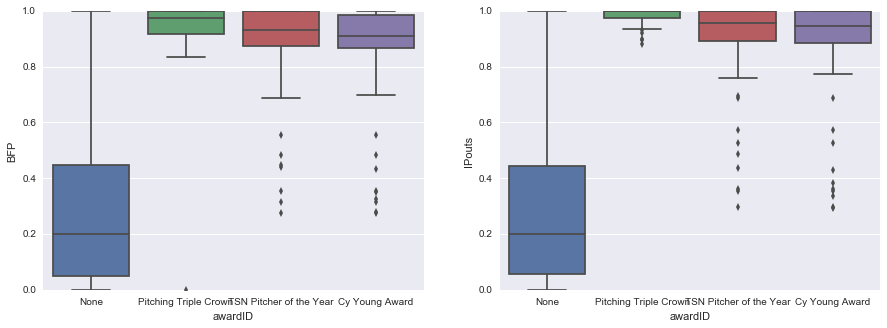

In [7]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot('awardID', 'BFP', data=pitcher_stats, ax=ax1)
sns.boxplot('awardID', 'IPouts', data=pitcher_stats, ax=ax2)

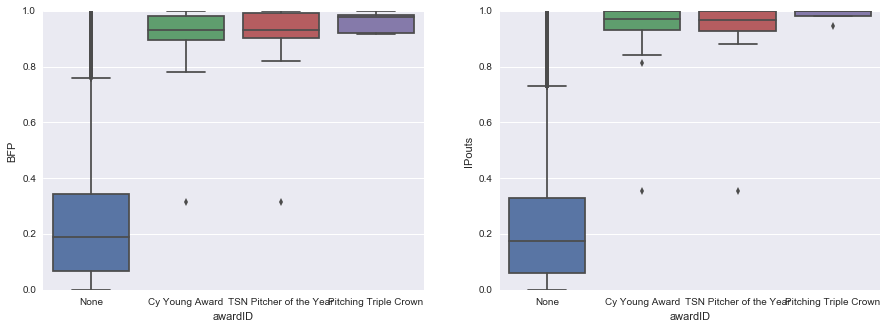

In [8]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot('awardID', 'BFP', data=pitcher_stats.loc[(pitcher_stats['yearID'] >= 2000)], ax=ax1)
sns.boxplot('awardID', 'IPouts', data=pitcher_stats.loc[(pitcher_stats['yearID'] >= 2000)], ax=ax2)